# Boston House Price Data:  End-to-End Predictive Machine Learning Problem 
Each row describes a Boston suburb or town. Data is from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 
The attributes are defined as follows (taken from the UCI Machine Learning Repository1):

1.   CRIM: per capita crime rate by town
2.   ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3.   INDUS: proportion of non-retail business acres per town
4.   CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5.   NOX: nitric oxides concentration (parts per 10 million)
6.   RM: average number of rooms per dwelling
7.   AGE: proportion of owner-occupied units built prior to 1940 8. DIS: weighted distances to five Boston employment centers 9. RAD: index of accessibility to radial highways
10.  TAX: full-value property-tax rate per 10,000
11.  PTRATIO: pupil-teacher ratio by town
12.  B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
14.  MEDV: Median value of owner-occupied homes in 1000s

In [1]:
import pandas as pd

# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data = 'housing.csv'

In [3]:
#Specifying short names for each attribute for clairty and simplicity.
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
#Attributes are delimited by whitespace rather than commas in the file.
df = pd.read_csv(data,delim_whitespace=True,names=columns)

In [5]:
#number of rows and columns
df.shape

(506, 14)

In [6]:
#data types for each column
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
#Scales for attributes are wildly different as shown through descriptive stats.  More than likely using differing units.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#no mising data
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
#quick look at the data
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [11]:
# descriptions, change precision.  summarize distribution of each attribute
pd.set_option('precision', 1)

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [12]:
# correlation. correlation between all of the numeric attributes
pd.set_option('precision', 2)

In [13]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


**Attributes with a strong correlation:  >.70 or <-.7**

NOX and INDUS with 0.77

DIS and INDUS with -0.71

TAX and INDUS with 0.72

AGE and NOX with 0.73

DIS and NOX with -0.78

LSTAT and MEDV with -0.74

*RM and MEDV with 0.70

# Data Visualizations

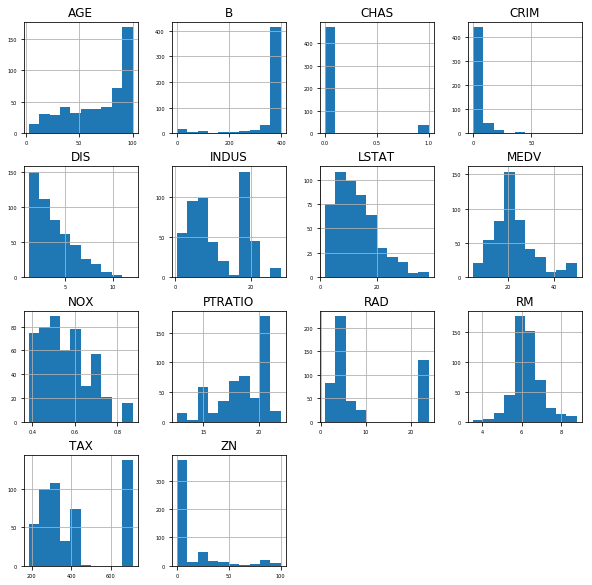

In [23]:
#histograms of individual attributes
df.hist(sharex=False,sharey=False,xlabelsize=5,ylabelsize=5,figsize=(10,10))
pyplot.show()

**Possible exponential distribution: CRIM, ZN, AGE and B**

**Bimodal distribution:  RAD and TAX**

**ODD distributino:  CHAS**

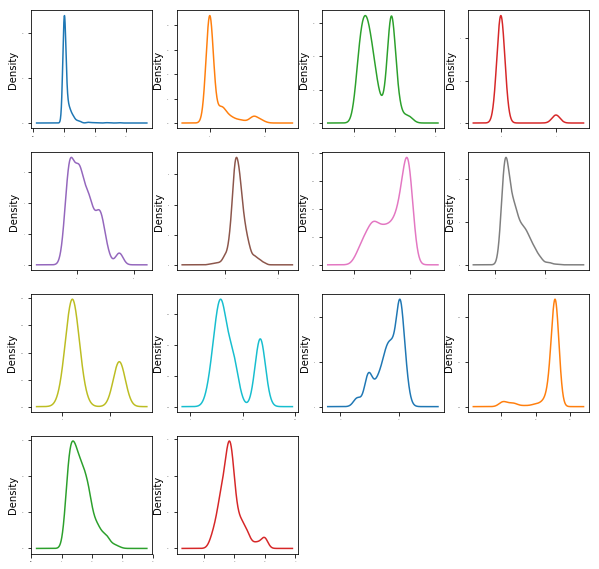

In [32]:
#density plots that smooth them out a bit
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1,figsize=(10,10))
pyplot.show()

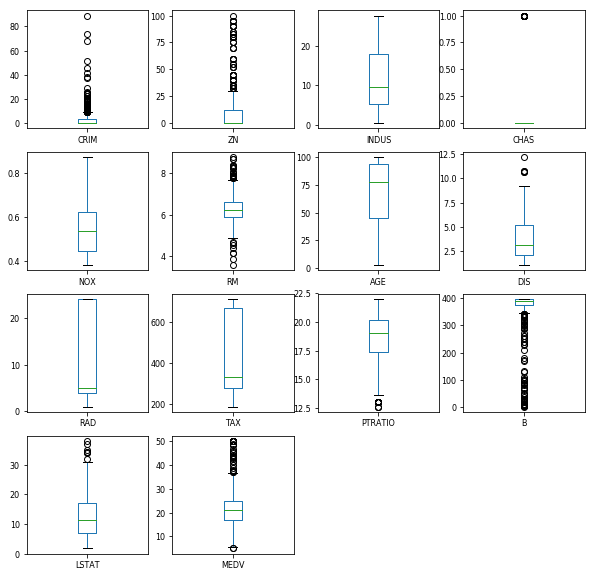

In [33]:
#box and whisker plots to show skew in distributions. At times the skew in the data looks like outliers
df.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,fontsize=8,figsize=(10,10))
pyplot.show()

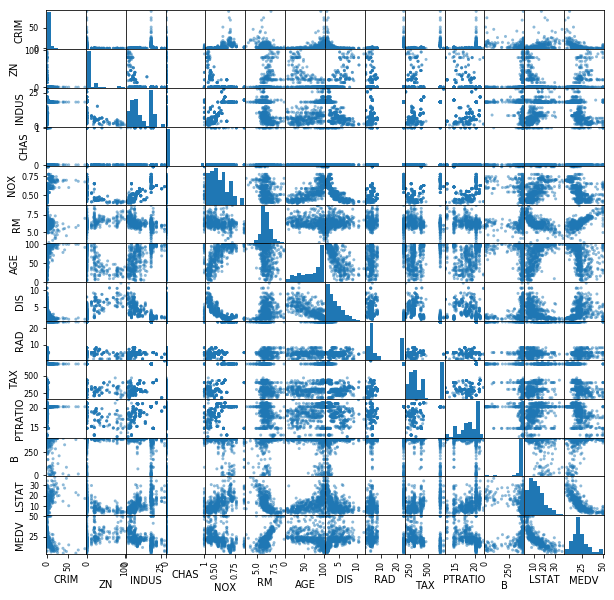

In [35]:
# scatter plot matrix showing interactions between variables
scatter_matrix(df, figsize=(10,10))
pyplot.show()

The higher correlated attributes do show good structure in their relationship:

NOX and INDUS

NOX and DIS

NOX and AGE

INDUS and DIS

INDUS and TAX

MEDV and LSTAT

MEDV and RM


Not linear, but nice predictable curved relationships.

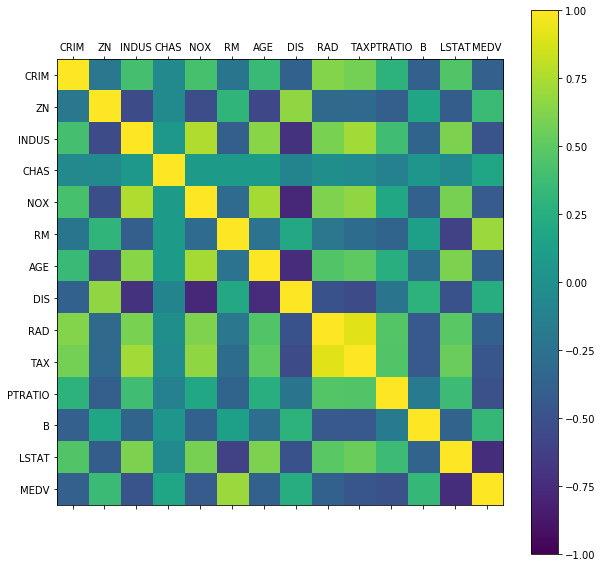

In [41]:
#visualize correlations between attributes through correlation matrix
fig = pyplot.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
pyplot.show()


**Yellow shows positive correlation whereas dark blue color shows negative correlation.**

**Some yellow and dark blue that suggest candidates for removal to better improve accuracy of models later on. (Esp CHAS)**

# Summar of Data Viz

Lots of structure in this data: 
    
    Thoughts to improve modeling accuracy:

Feature selection and removing the most correlated attributes.

Normalizing the dataset to reduce the effect of differing scales.

Standardizing the dataset to reduce the effects of differing distributions.

Binning (discretization) of the data. Improve accuracy for decision tree algorithms.

# Validation Data

80% of the data for modeling and 20% for validation.

In [43]:
# Split-out validation data
array = df.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

Test harness:  Automated test framework to test by running it under varying conditions and monitoring its behavior and outputs. 

In [44]:
#Mean Squared Error (MSE) metric. MSE will give a quick idea of how wrong all predictions are (0 is perfect).
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Baseline of performance on this problem and spot-check a number of different algorithms. 
A suite of different algorithms capable of working on this problem. The six algorithms selected include:

Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).

Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [46]:
#Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))

**Default tuning parameters** 

Mean and standard deviation of MSE for each algorithm

In [47]:
#evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -24.021546 (9.708114)
SVR: -85.518342 (31.994798)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

LR has the lowest MSE, followed closely by CART.

**Distribution of scores across all cross-validation folds by algorithm**

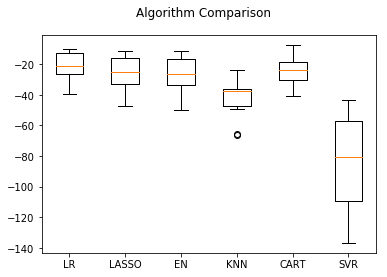

In [48]:
# Compare Algorithms
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

Similar distributions for the regression algorithms and perhaps a tighter distribution of scores for CART

Differing scales of the data is probably hurting the skill of all of the algorithms and perhaps more so for SVR and KNN

# Standardization

Data is transformed such that each attribute has a mean value of zero and a standard deviation of 1

Using pipelines that standardize the data and building the model for each fold in the cross-validation test harness to avoid leakage

In [50]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -27.336671 (12.738868)
ScaledSVR: -29.633086 (17.009186)


List of mean squared errors: Scaling did have an effect on KNN, driving the error lower than the other models

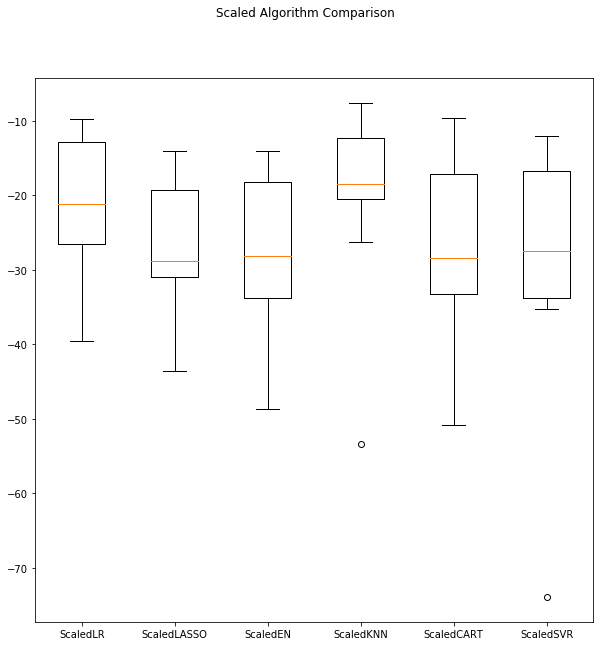

In [54]:
#distribution of the scores across the cross-validation folds
fig = pyplot.figure(figsize=(10,10))
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

KNN has both a tight distribution of error and has the lowest score

# Tuning

Default value for the number of neighbors in KNN is 7

We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score. The below example tries odd k values from 1 to 21, an arbitrary range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross-validation on a standardized copy of the training dataset.

In [55]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [57]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


Best for k (n neighbors) is 3 providing a mean squared error of -18.172137

## Ensemble Methods

Evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:

Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM)

Bagging Methods: Random Forests (RF) and Extra Trees (ET)

Same test harness as before, 10-fold cross-validation and pipelines that standardize the training data for each fold

In [61]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: -15.066465 (6.710489)
ScaledGBM: -10.190965 (4.498477)
ScaledRF: -13.666926 (7.868788)
ScaledET: -10.745123 (4.482248)


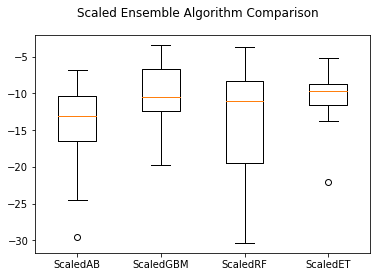

In [63]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Gradient Boosting has a better mean score, and it also looks like Extra Trees has a similar distribution and perhaps a better median score

# Tune Ensemble Methods

Default number of boosting stages to perform (n estimators) was 100. 

The larger the number of boosting stages, the better the performance but the longer the training time. 

Tuning the number of stages for gradient boosting. A parameter grid n estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold cross-validation.

In [66]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=True)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.353870 using {'n_estimators': 400}
-10.812167 (4.724394) with: {'n_estimators': 50}
-10.040857 (4.441758) with: {'n_estimators': 100}
-9.694045 (4.275653) with: {'n_estimators': 150}
-9.539481 (4.270153) with: {'n_estimators': 200}
-9.449042 (4.261930) with: {'n_estimators': 250}
-9.426909 (4.271399) with: {'n_estimators': 300}
-9.366779 (4.251669) with: {'n_estimators': 350}
-9.353870 (4.265816) with: {'n_estimators': 400}


The best configuration was n estimators=400 resulting in a mean squared error of -9.353870, about XXX units better than the untuned method.

## Finalize Model

Prepare model and train it on the entire training dataset. Standardizing the training dataset before training

In [67]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.878916447820348


Estimated mean squared error is 11.8, close to our estimate of -9.3

## Summary

Problem Definition (Boston house price data)

Loaded the Dataset

Analyzed Data (some skewed distributions and correlated attributes)

Evaluated Algorithms (Linear Regression looked good)

Evaluated Algorithms with Standardization (KNN looked good)

Algorithm Tuning (K=3 for KNN was best)

Ensemble Methods (Bagging and Boosting, Gradient Boosting looked good) 

Tuned Ensemble Methods (getting the most from Gradient Boosting)

Finalized Model (use all training data and confirm using validation dataset)